In [67]:
from netCDF4 import Dataset
import numpy as np
import glob
import os
import pandas as pd
import wrf
import datetime
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [68]:
wrfile = Dataset('/media/lucasdmarten/HD/DADOS_TCC/RESULTADOS/MEMBRO5/wrfout_d01_2018-05-22_18:00:00')
torres = pd.read_csv('/media/lucasdmarten/HD/backup/projetos/tcc/tcc/data/lat_lon_towers.txt', usecols=[1,2]).values
geo = Dataset('/media/lucasdmarten/HD/wrf/domains/firstDomainPC/geo_em.d01.nc')

In [66]:
torres[:3]

array([[-30.84703734, -55.73664773],
       [-30.85747533, -55.68136511],
       [-30.79000882, -55.70578024]])

In [69]:
speed = wrf.getvar(wrfile,'wspd_wdir', timeidx=wrf.ALL_TIMES)[0]
z = wrf.getvar(wrfile, 'z', units='m')

In [70]:
topo = wrf.getvar(geo,'HGT_M')
topo = int(topo[49,49].values)

In [91]:
topo

286

In [93]:
speed_at100

<xarray.DataArray 'wspd_wdir_interp' (Time: 325)>
array([4.27626672, 4.26203201, 4.25990563, 4.30277876, 4.3594398 ,
       4.40762649, 4.47799876, 4.45734201, 4.50770799, 4.53425589,
       4.52690748, 4.56105924, 4.63437213, 4.7374371 , 4.8987982 ,
       4.97631844, 5.05730058, 5.19862529, 5.32039583, 5.48933019,
       5.64995353, 5.76028122, 5.84925135, 5.95835229, 6.02798367,
       6.11364245, 6.23210263, 6.35044553, 6.47713172, 6.59242914,
       6.67526194, 6.7165437 , 6.70152279, 6.66152433, 6.64134703,
       6.63802425, 6.61250409, 6.5589977 , 6.49647178, 6.43036297,
       6.35689647, 6.26908972, 6.20113123, 6.13181811, 6.04439892,
       5.95235904, 5.84228055, 5.74903165, 5.67656952, 5.58103279,
       5.46082836, 5.36842983, 5.27496057, 5.19735536, 5.12040239,
       5.0176289 , 4.9168333 , 4.84252437, 4.77372055, 4.73953546,
       4.73478413, 4.75173013, 4.76446534, 4.76907967, 4.77106906,
       4.76867075, 4.76051118, 4.74193946, 4.72192371, 4.71547427,
       4.70998272, 4.69186161, 4.67595293, 4.65073498, 4.61816219,
       4.58745492, 4.55407959, 4.52356273, 4.49778493, 4.45521642,
       4.39940387, 4.34773713, 4.29366   , 4.26131272, 4.24738061,
       4.23597569, 4.2180779 , 4.19603921, 4.166301  , 4.13311411,
       4.09987909, 4.0577647 , 4.00619109, 3.95147918, 3.8807923 ,
       3.80744132, 3.74474891, 3.68005703, 3.61885263, 3.56623078,
...
       4.18608794, 4.17630388, 4.14923856, 4.11526177, 4.07486109,
       4.04726666, 4.03799347, 4.03366313, 4.03905677, 4.05443074,
       4.08647637, 4.13348498, 4.184042  , 4.24061485, 4.28381655,
       4.32086749, 4.35964118, 4.39375926, 4.41804356, 4.43763379,
       4.44748795, 4.44922251, 4.45091161, 4.45228739, 4.44505355,
       4.40936685, 4.34475224, 4.26184503, 4.12442962, 3.94628701,
       3.72165279, 3.36456123, 3.15031634, 3.12765231, 3.17822897,
       3.22850281, 3.29531867, 3.36702294, 3.41883771, 3.45133417,
       3.44156612, 3.43131619, 3.39760823, 3.35344471, 3.32985347,
       3.29912823, 3.25146405, 3.18321295, 3.1089669 , 3.02209912,
       2.9244213 , 2.8499416 , 2.75027864, 2.65637646, 2.58709325,
       2.4984071 , 2.4074659 , 2.35658804, 2.30776471, 2.26465207,
       2.22736395, 2.20221348, 2.20089631, 2.20619366, 2.20873402,
       2.21612686, 2.22650798, 2.23689616, 2.24507104, 2.2663643 ,
       2.3032967 , 2.33424598, 2.36248061, 2.42616358, 2.51373611,
       2.61886116, 2.73085737, 2.82698735, 2.89786261, 2.96305309,
       3.01232726, 3.04476294, 3.08089121, 3.12387394, 3.16029444,
       3.19163758, 3.20449284, 3.20915516, 3.21771831, 3.24308723,
       3.27368438, 3.31505702, 3.3594734 , 3.40562192, 3.48132459,
       3.5825863 , 3.69541265, 3.84487037, 4.00730636, 4.15699798])
Coordinates:
    wspd_wdir  <U4 'wspd'
    XLONG      float32 -55.68
    XLAT       float32 -30.86
    XTIME      (Time) float32 0.0 10.5 21.0 30.0 ... 3.22e+03 3.231e+03 3.24e+03
  * Time       (Time) datetime64[ns] 2018-05-22T18:00:00 ... 2018-05-25
    level      int64 394
Attributes:
    FieldType:      104
    units:          m s-1
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=-60.0, moad_cen_lat=-30.856998...
    missing_value:  9.969209968386869e+36
    _FillValue:     9.969209968386869e+36
    vert_units:     m

In [92]:
speed_at100 = wrf.interplevel(speed, z, 108+topo)[:,49,49]

In [94]:
t = wrf.getvar(wrfile, 'times', timeidx=wrf.ALL_TIMES)
pred = speed_at100[36:-1]

In [95]:
d = pd.read_csv('../tcc/data/ecc3_.csv')

dCaso1 = d[(d.data>'2018-05-23') & (d.data<'2018-05-25')]
di = datetime.datetime(2018,5,23,0)
df = datetime.datetime(2018,5,25,0)
dates = []
while di < df:
    dates.append(di)
    di += datetime.timedelta(hours=1)

In [96]:
dCaso1.columns

Index(['data', 'hora', 'erro', 'hPa', 'tp', 'ur', 'vs_med', 'vs_max', 'vs_min',
       'vs_dev', 'ds_med', 'ds_dev', 'vi_med', 'vi_max', 'vi_min', 'vi_dev',
       'di_med', 'di_dev', 'vm_med', 'vm_max', 'vm_min', 'vm_dev'],
      dtype='object')

In [97]:
box=[]
box_p=[]
datas=[]
i=0
while i < 288:
    box_p.append(list(pred[i:i+6].values))
    box.append(list(map(float,dCaso1.iloc[i:i+6,6].to_list())))
    datas.append(list(map(str,dCaso1.iloc[i:i+6,0].to_list()))[-1])
    i+=6
newdates=[]
for i in range(len(datas)):
    date_obj = datetime.datetime.strptime(datas[i], '%Y-%m-%d %H:%M:%S')
    newdates.append('{:02d}/{:02d} - {:02d}hrs'.format(date_obj.day,date_obj.month,date_obj.hour))

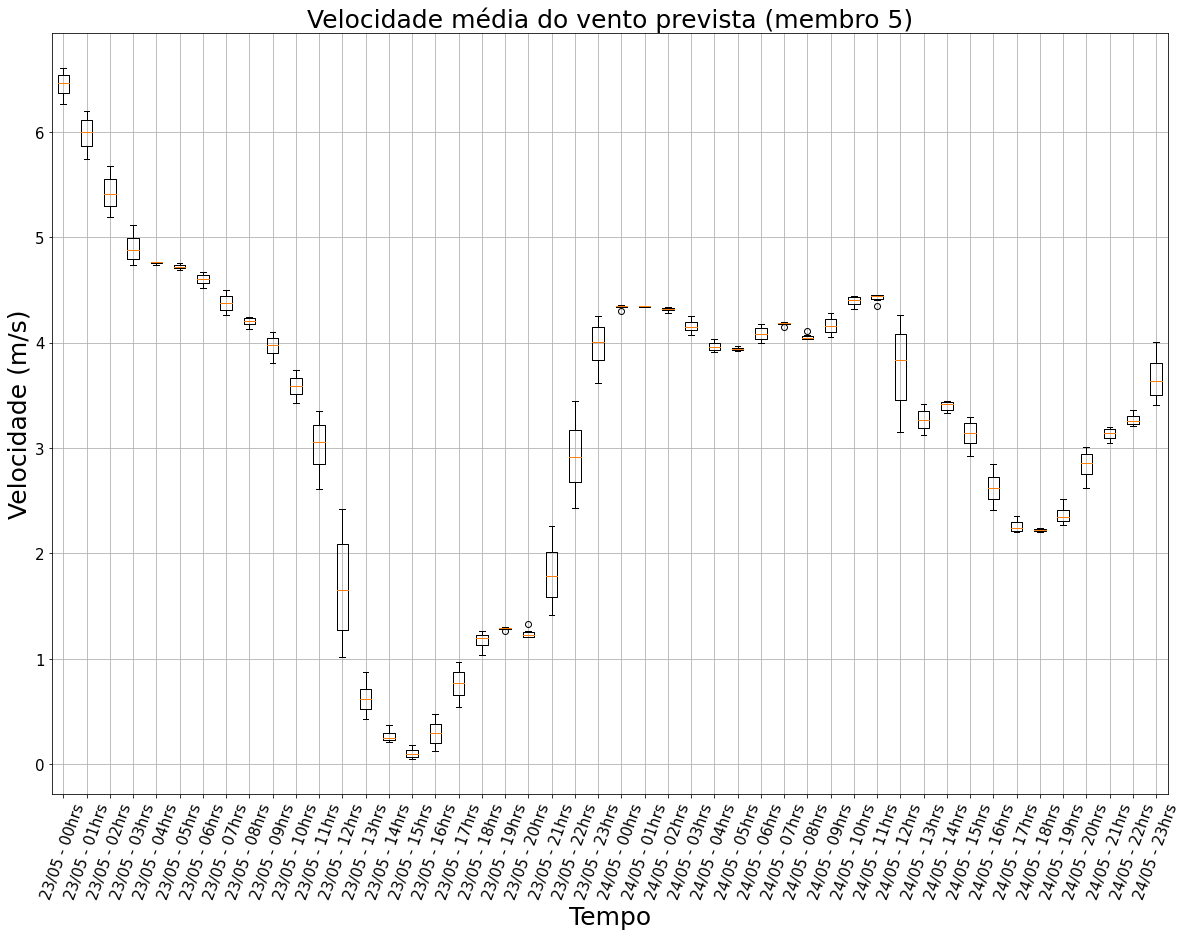

In [98]:
fig = plt.figure(figsize =(20, 14))
# Creating plot
plt.boxplot(x=box_p, labels=newdates)
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel("Velocidade (m/s)", fontsize=25)
plt.xlabel("Tempo", fontsize=25)
plt.yticks(fontsize=15)

plt.xticks(fontsize=15)

plt.grid(True)
plt.title("Velocidade média do vento prevista (membro 5)",  fontsize=25)
# show plot
#plt.savefig('pred_memb3.png',dpi=300)
plt.show()

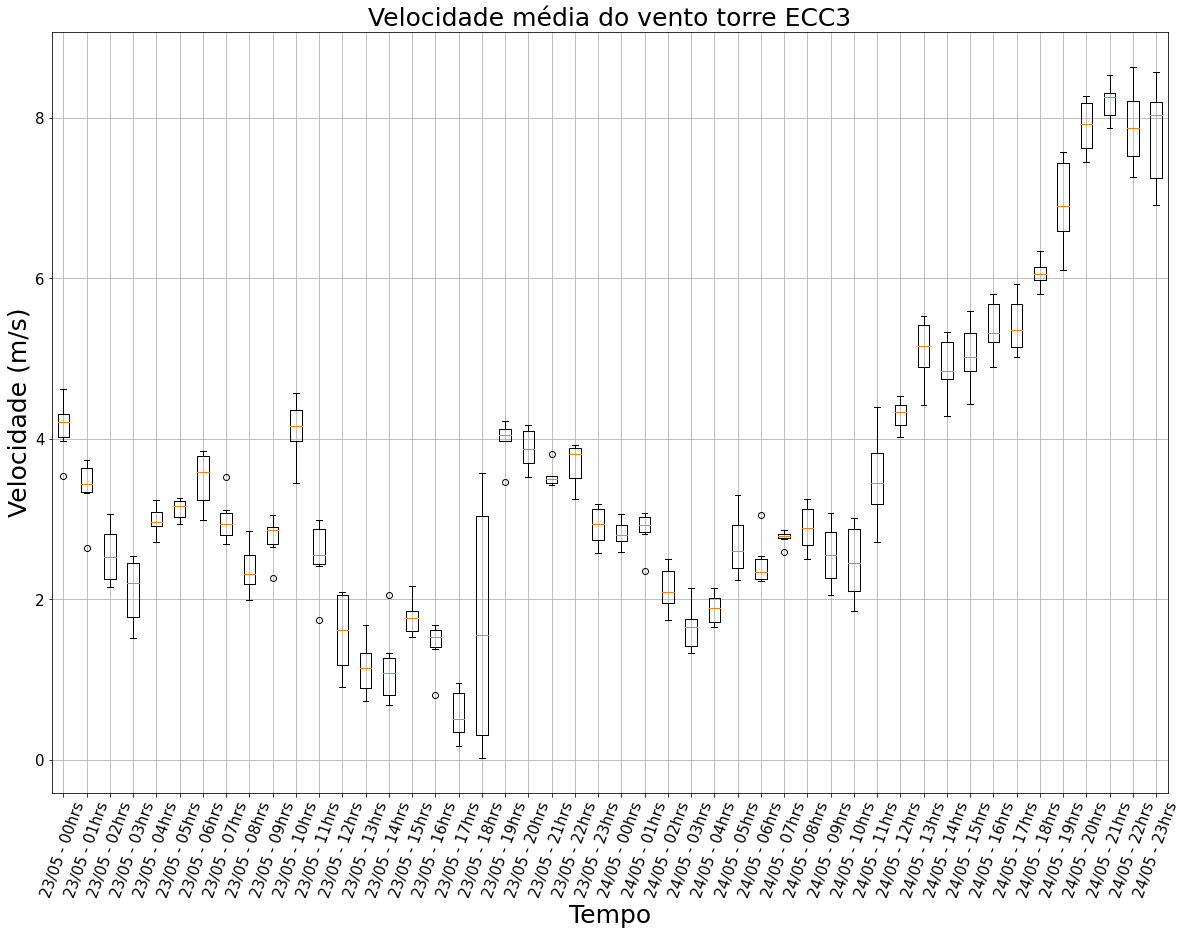

In [99]:
fig = plt.figure(figsize =(20, 14))
# Creating plot
plt.boxplot(x=box, labels=newdates)
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel("Velocidade (m/s)", fontsize=25)
plt.xlabel("Tempo", fontsize=25)
plt.yticks(fontsize=15)

plt.xticks(fontsize=15)

plt.grid(True)
plt.title("Velocidade média do vento torre ECC3",  fontsize=25)
# show plot
#plt.savefig('obs_ecc3.png',dpi=300)
plt.show()

In [100]:
mean_absolute_error(box,box_p)

1.9666031495579972

In [101]:
mean_squared_error(dCaso1.vs_med,pred)

5.448869971347398

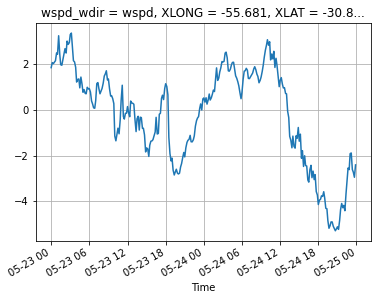

In [87]:
x =  pred-dCaso1.vs_med.astype(float)
plt.grid()
x.plot()